<a href="https://colab.research.google.com/github/MGuvenc/Alzheimer-Detection/blob/main/alzheimer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alzheimer Detection

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import os, random, pathlib

from keras.utils import image_dataset_from_directory
from keras import layers

In [3]:
dir = 'drive/MyDrive/Biyomedikal Projesi/Dataset/'
data_dir = pathlib.Path(dir)

In [4]:
classes = np.array([sorted(item.name for item in data_dir.glob("*"))])
classes

array([['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
        'Very_Mild_Demented']], dtype='<U18')

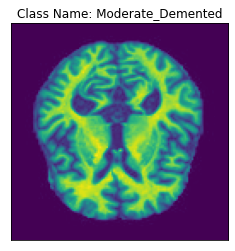

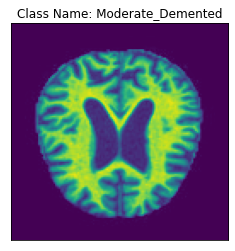

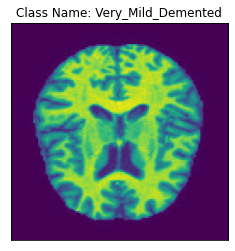

In [5]:
def exImage():
  randomClass = random.choice(classes[0,:])
  randomImage = random.choice(list(data_dir.glob(randomClass+"/*.jpg")))
  a= plt.figure(figsize=(4, 4))
  image = plt.imread(randomImage)
  plt.xticks([])
  plt.yticks([])
  plt.title("Class Name: "+ str(randomClass))
  plt.imshow(image)
exImage()
exImage()
exImage()

In [6]:
batch_size = 32
img_height = 224
img_width = 224

In [7]:
train_data = image_dataset_from_directory(data_dir, validation_split=0.2, subset='training', seed=123, 
                                          image_size=(img_height, img_width), batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.


In [8]:
test_data = image_dataset_from_directory(data_dir, validation_split=0.2, subset='validation', seed=123, 
                                         image_size=(img_height, img_width), batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [9]:
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.5),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [10]:
model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [11]:
epochs = 5
history = model.fit(train_data, epochs=epochs, validation_data=test_data, batch_size=batch_size)

Epoch 1/5
160/160 [==============================] - 785s 4s/step - loss: 1.0416 - accuracy: 0.5023 - val_loss: 0.8725 - val_accuracy: 0.5859
Epoch 2/5
160/160 [==============================] - 265s 2s/step - loss: 0.8425 - accuracy: 0.6184 - val_loss: 0.6918 - val_accuracy: 0.7000
Epoch 3/5
160/160 [==============================] - 263s 2s/step - loss: 0.6497 - accuracy: 0.7146 - val_loss: 0.5121 - val_accuracy: 0.7883
Epoch 4/5
160/160 [==============================] - 261s 2s/step - loss: 0.4589 - accuracy: 0.8107 - val_loss: 0.3643 - val_accuracy: 0.8461
Epoch 5/5
160/160 [==============================] - 264s 2s/step - loss: 0.3572 - accuracy: 0.8578 - val_loss: 0.2344 - val_accuracy: 0.9195


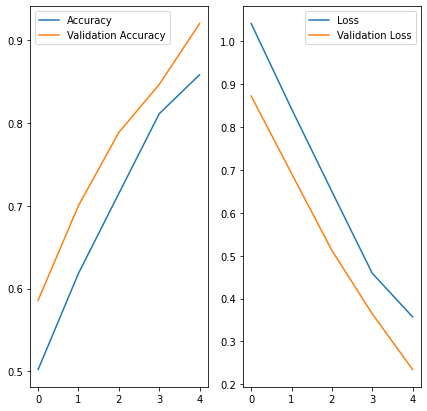

In [12]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(7,7))
plt.subplot(121)
plt.plot(epochs_range, accuracy, label='Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend()

plt.subplot(122)
plt.plot(epochs_range, loss, label='Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 38ms/step


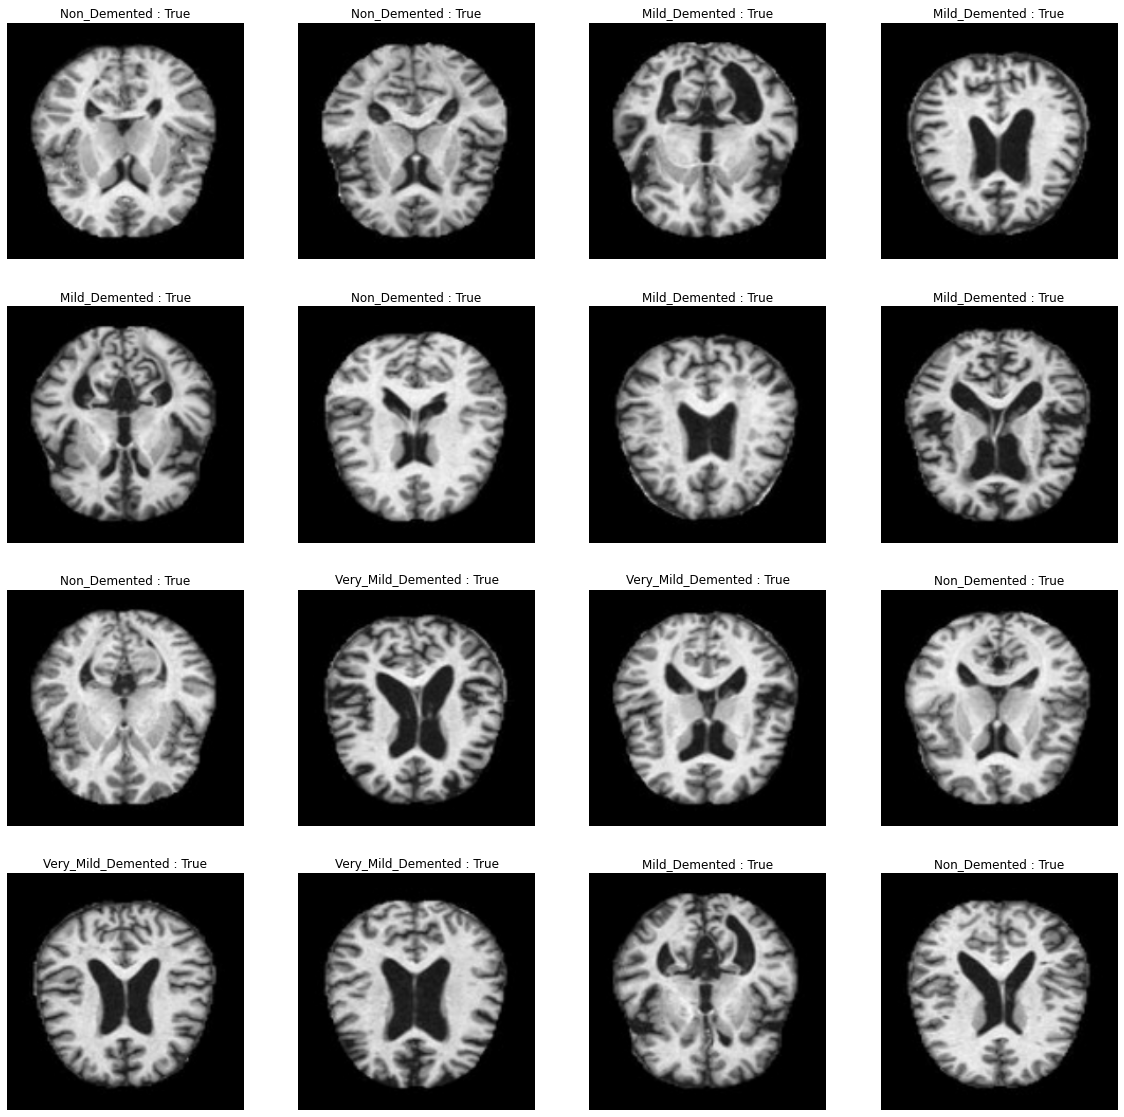

In [13]:
plt.figure(figsize=(20,20))
class_name = test_data.class_names
result = False
for images, labels in test_data.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    img = images[i].numpy().astype('uint8')
    img = tf.expand_dims(img, axis=0)
    predictions = model.predict(img)
    prediction_class = np.argmax(predictions)
    if class_name[prediction_class] == class_name[labels[i]]:
      result = True
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_name[prediction_class] + " : " + str(result))
    plt.axis('off')